In [1]:
import random
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import scipy
# from fitter import Fitter, get_common_distributions, get_distributions
from math import pi, exp

In [2]:
db = pd.read_csv(r'../dane/moves300600_noindex.csv')

In [29]:
db['game_ID'].max()

275994

In [30]:
db.loc[510:520,[column for column in db.columns if column not in ["WhiteRatingDiff",'Unnamed: 0']]]

,game_ID,score,delta_time,WhiteElo,BlackElo,TimeControl,color,move,Result
510,9,0,0,1192,1204,300+0,w,23,0-1
511,9,0,9,1192,1204,300+0,b,23,0-1
512,9,0,2,1192,1204,300+0,w,24,0-1
513,9,0,18,1192,1204,300+0,b,24,0-1
514,9,0,7,1192,1204,300+0,w,25,0-1
515,9,0,10,1192,1204,300+0,b,25,0-1
516,9,blunder,8,1192,1204,300+0,w,26,0-1
517,9,blunder,8,1192,1204,300+0,b,26,0-1
518,9,mistake,4,1192,1204,300+0,w,27,0-1
519,9,0,2,1192,1204,300+0,b,27,0-1


In [31]:
a = db.groupby('TimeControl').agg({'score': 'count'})
a['percent'] = a['score']/sum(a['score'])
a.sort_values('percent',ascending=False).head(6)

,score,percent
TimeControl,,
600+0,9863104,0.562834
300+0,7645389,0.436281
3600+0,15519,0.000886


prawdopodobienstwo popełenienia błedu w zależności od czasu dla 300+0

In [32]:
def histogram(x: list, xlabel='',ylabel='',title='',xlim=(-.5,61),ylim=None,show=False, **kwargs):
    # the histogram of the data
    n, bins, patches = plt.hist(x, density = True,bins= int(max(x))+1,**kwargs)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
#     plt.text(50, .035, r'$\mu = 50,\
# \ \sigma = 13$')
    if ylim:
        plt.ylim(ylim[0],ylim[1])
    if xlim:
        plt.xlim(xlim[0],xlim[1])
    plt.grid(True)
    if show:
        plt.show()
    return

485521

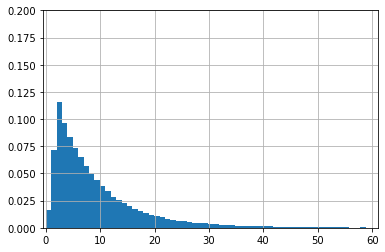

In [33]:
blunder_300 = db[(db['score'] == 'blunder' )&( db['TimeControl'] == '300+0') & (db['move'] > 4) & (db['delta_time']>= 0) ]
histogram(blunder_300['delta_time'],ylim=(0,0.2))
len(blunder_300)

6676823

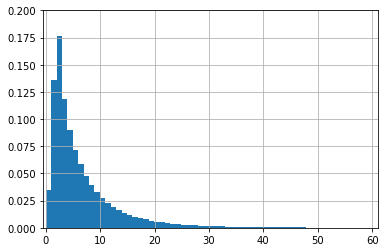

In [34]:
all_300 = db[(db['TimeControl'] == '300+0') & (db['move'] > 4) & (db['delta_time']>= 0) ]
histogram(all_300['delta_time'],ylim=(0,0.2))
len(all_300)

In [35]:
# blunder_60 = db[(db['score'] == 'mistake' )&( db['TimeControl'] == '300+0') & (db['delta_time']<= 60)& (db['move'] > 4) & (db['delta_time']>= 0) ]
# # c = blunder_60['delta_time'].hist(bins = 60, density = True)
# histogram(blunder_60['delta_time'],bins=60,ylim=(0,0.2))
# len(blunder_60)

In [36]:
# blunder_60 = db[(db['score'] == 'dubious move' )&( db['TimeControl'] == '300+0') & (db['delta_time']<= 60)& (db['move'] > 4) & (db['delta_time']>= 0) ]
# histogram(blunder_60['delta_time'],bins=60,ylim=(0,0.2))
# len(blunder_60)

prawdopodobienstwo popełenienia błedu w zależności od ruchu dla 300+0

In [37]:

m = db[db['TimeControl']=='300+0'][['score','move','Result']].groupby(['move','score']).count().reset_index()
m

,move,score,Result
0,1,0,238837
1,1,dubious move,2764
2,1,mistake,329
3,2,0,214506
4,2,blunder,215
...,...,...,...
403,109,0,12
404,110,0,9
405,111,0,6
406,112,0,4


In [38]:
m2 = pd.merge(m,m.groupby('move').sum().reset_index(),how='left', on='move')
m2['prob'] = m2['Result_x']/m2['Result_y']

In [39]:
m2[m2['score']=='blunder'][['score','move','prob']]

,score,move,prob
4,blunder,2,0.000889
8,blunder,3,0.004464
12,blunder,4,0.010586
16,blunder,5,0.018761
20,blunder,6,0.027394
...,...,...,...
378,blunder,96,0.016393
381,blunder,97,0.034783
385,blunder,98,0.029412
389,blunder,99,0.021277


<AxesSubplot:xlabel='move'>

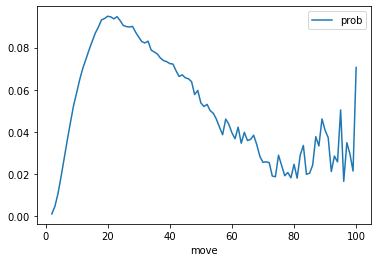

In [40]:
m2[m2['score']=='blunder'][['move','prob','Result_y']].plot(x='move',y='prob')

<AxesSubplot:xlabel='move'>

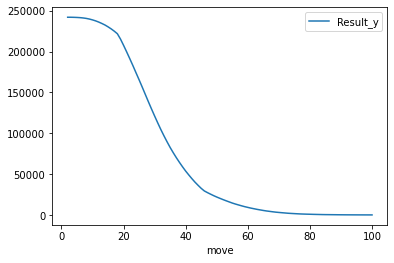

In [41]:
m2[m2['score']=='blunder'][['move','prob','Result_y']].plot(x='move',y='Result_y')


prawdopodobienstwo popełenienia błedu w zależności od czasu dla 300+0

In [42]:
m = db[(db['TimeControl']=='300+0') & (db['delta_time']>=0)& (db['delta_time']<=60)][['score','delta_time','Result']].groupby(['delta_time','score']).count().reset_index()
m

,delta_time,score,Result
0,0,0,480941
1,0,blunder,8109
2,0,dubious move,28744
3,0,mistake,12929
4,1,0,926766
...,...,...,...
239,59,mistake,171
240,60,0,301
241,60,blunder,103
242,60,dubious move,77


In [43]:
m2 = pd.merge(m,m.groupby('delta_time').sum().reset_index(),how='left', on='delta_time')
m2['prob'] = m2['Result_x']/m2['Result_y']

In [44]:
m2[m2['score']=='blunder'][['score','delta_time','prob']]

,score,delta_time,prob
1,blunder,0,0.015279
5,blunder,1,0.030672
9,blunder,2,0.041701
13,blunder,3,0.053850
17,blunder,4,0.063121
...,...,...,...
225,blunder,56,0.153667
229,blunder,57,0.161928
233,blunder,58,0.174079
237,blunder,59,0.152975


<AxesSubplot:xlabel='delta_time'>

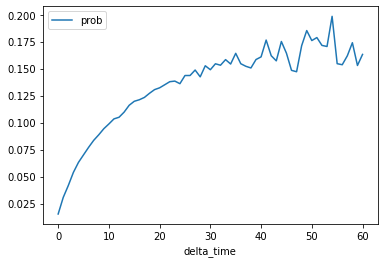

In [45]:
m2[m2['score']=='blunder'][['delta_time','prob','Result_y']].plot(x='delta_time',y='prob')

<AxesSubplot:xlabel='delta_time'>

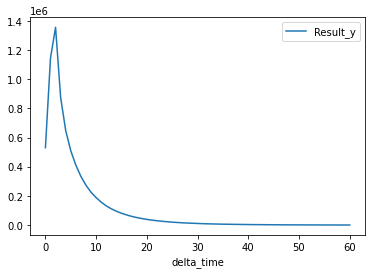

In [46]:
m2[m2['score']=='blunder'][['delta_time','prob','Result_y']].plot(x='delta_time',y='Result_y')

In [47]:
db.groupby('TimeControl').size().reset_index().sort_values(by=0,ascending=False).head(10)

,TimeControl,0
2,600+0,9863104
0,300+0,7645389
1,3600+0,15519


In [48]:
# fitting dist to data try
# blunder_60['delta_time'].var()
def lognorm_params(data):
    ex = data.mean()
    var = data.var()

    mu = np.log(ex**2/np.sqrt(var+ex**2))
    sigma = np.log(var/ex**2 +1)
    return mu, sigma
# def gamma_params(data)

In [49]:
print(lognorm_params(blunder_300['delta_time']))


(1.8371885195101465, 0.7376435535152104)


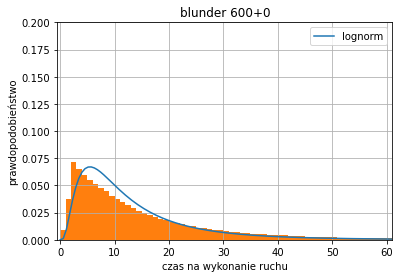

In [50]:
blunder_600 = db[(db['score'] == 'blunder' )&( db['TimeControl'] == '600+0') & (db['move'] > 4) & (db['delta_time']>= 0) ]
# histogram(blunder_600['delta_time'],show=True,ylim=(0,0.2))
# len(blunder_600)
y = blunder_600['delta_time']
# size = len(y)
x = np.linspace(min(y)+0.0001,max(y),1000)


ex,var = lognorm_params(y)

X=1/(x*var*np.sqrt(2*pi))*np.exp(-(np.log(x)-ex)**2/(2*var**2))

plt.plot(x,X, label='lognorm')
histogram(y,ylim=(0,0.2),xlabel='czas na wykonanie ruchu', ylabel='prawdopodobieństwo',title='blunder 600+0')
plt.legend(loc='upper right')
plt.show()

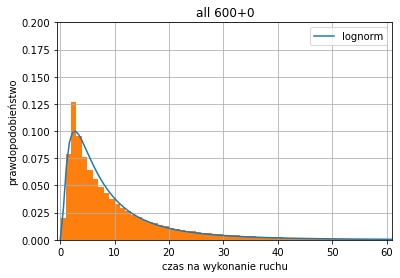

In [51]:
all_600 = db[( db['TimeControl'] == '600+0') & (db['move'] > 4) & (db['delta_time']>= 0) ]
# histogram(blunder_600['delta_time'],show=True,ylim=(0,0.2))
# len(blunder_600)
y = all_600['delta_time']
# size = len(y)
x = np.linspace(min(y)+0.0001,max(y),1000)


ex,var = lognorm_params(y)

X=1/(x*var*np.sqrt(2*pi))*np.exp(-(np.log(x)-ex)**2/(2*var**2))

plt.plot(x,X, label='lognorm')
histogram(y,ylim=(0,0.2),xlabel='czas na wykonanie ruchu', ylabel='prawdopodobieństwo',title='all 600+0')
plt.legend(loc='upper right')
plt.show()

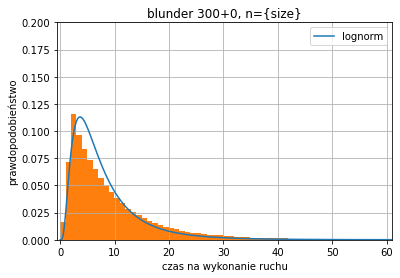

In [52]:
y = blunder_300['delta_time']

# size = len(y)
x = np.linspace(min(y)+0.0001,max(y),1000)


ex,var = lognorm_params(y)

X=1/(x*var*np.sqrt(2*pi))*np.exp(-(np.log(x)-ex)**2/(2*var**2))

plt.plot(x,X, label='lognorm')
histogram(y,ylim=(0,0.2),xlabel='czas na wykonanie ruchu', ylabel='prawdopodobieństwo',title='blunder 300+0, n={size}')
plt.legend(loc='upper right')
plt.show()

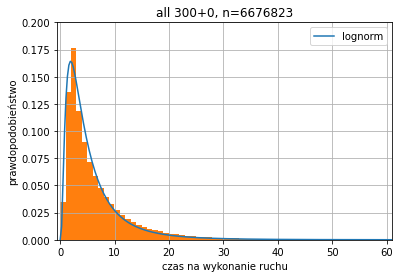

In [53]:

y = all_300['delta_time']

size = len(y)
x = np.linspace(min(y)+0.0001,max(y),1000)


ex,var = lognorm_params(y)

X=1/(x*var*np.sqrt(2*pi))*np.exp(-(np.log(x)-ex)**2/(2*var**2))

plt.plot(x,X, label='lognorm')
histogram(y,ylim=(0,0.2),xlabel='czas na wykonanie ruchu', ylabel='prawdopodobieństwo',title=f'all 300+0, n={size}')
plt.legend(loc='upper right')
plt.show()


In [54]:
# size = len(all_300['delta_time'])
# x = np.linspace(min(all_300['delta_time'])+0.0001,max(all_300['delta_time']),1000)
# y = all_300['delta_time']
#
# dist_names = ['weibull_min']
#
# ###
# ex,var = lognorm_params(y)
# ###
# for dist_name in dist_names:
#     dist = getattr(scipy.stats, dist_name)
#     params = dist.fit(y)
#     arg = params[:-2]
#     loc = params[-2]
#     scale = params[-1]
#     print(params)
#     if arg:
#         pdf_fitted = dist.pdf(x, *arg, loc=loc, scale=scale)
#     else:
#         pdf_fitted = dist.pdf(x, loc=loc, scale=scale)
#     plt.plot(x,pdf_fitted, label=dist_name)
# histogram(y,ylim=(0,0.2),xlabel='czas na wykonanie ruchu', ylabel='prawdopodobieństwo')
# plt.legend(loc='upper right')
# plt.show()
# (blunder_300['delta_time']).mean()

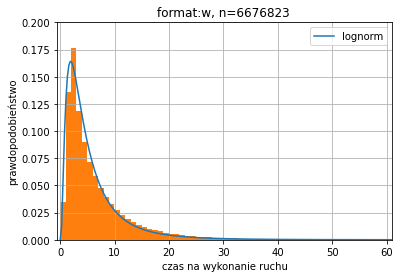

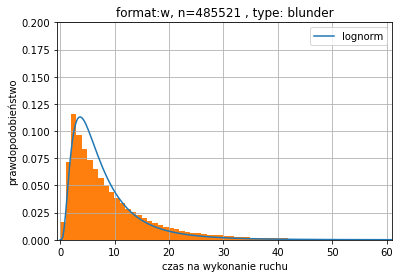

KeyboardInterrupt: 

In [55]:
for item in [all_300,blunder_300,all_600,blunder_600]:

    y = item['delta_time']

    size = len(y)
    x = np.linspace(min(y)+0.0001,max(y),1000)


    ex,var = lognorm_params(y)

    X=1/(x*var*np.sqrt(2*pi))*np.exp(-(np.log(x)-ex)**2/(2*var**2))

    plt.plot(x,X, label='lognorm')
    histogram(y,ylim=(0,0.2),xlabel='czas na wykonanie ruchu', ylabel='prawdopodobieństwo',title=f'format:{item.iloc[0,6]}, n={size} {", type: blunder" if item.iloc[0,1]=="blunder" else ""}')
    plt.legend(loc='upper right')
    plt.show()

porównanie
zależność:
x -  numer ruchu, y średni czas na wykonanie - dla wszystkich ruchów i tylko dla ruchów blunder

In [ ]:
format = '600+0'
a = db.groupby(['TimeControl','move']).agg({'delta_time': np.mean}).reset_index()

p1 = a[a['TimeControl'] == format][['move','delta_time']]
b = db.groupby(['TimeControl','score','move']).agg({'delta_time': np.mean}).reset_index()
p2 = b[(b['TimeControl'] == format) & (b['score'] == 'blunder')][['move','delta_time']]

plt.figure(1)
plt.plot(p1['move'],p1['delta_time'],label='wszystkie ruchy')

plt.fill_between(db[db['TimeControl']==format][['TimeControl','move','delta_time']].groupby(['TimeControl','move']).quantile(0.25).reset_index()['move'],
                 db[db['TimeControl']==format][['TimeControl','move','delta_time']].groupby(['TimeControl','move']).quantile(0.25).reset_index()['delta_time'],
                 db[db['TimeControl']==format][['TimeControl','move','delta_time']].groupby(['TimeControl','move']).quantile(0.75).reset_index()['delta_time'],
                 alpha=0.2,label="wsz. ruchy, r.\nmiędzykwartylowy")

plt.plot(p2['move'],p2['delta_time'],label='duży błąd')
plt.fill_between(db[(db['TimeControl']==format) & (db['score']=='blunder')][['TimeControl','move','delta_time']].groupby(['TimeControl','move']).quantile(0.25).reset_index()['move'],
                 db[(db['TimeControl']==format) & (db['score']=='blunder')][['TimeControl','move','delta_time']].groupby(['TimeControl','move']).quantile(0.25).reset_index()['delta_time'],
                 db[(db['TimeControl']==format) & (db['score']=='blunder')][['TimeControl','move','delta_time']].groupby(['TimeControl','move']).quantile(0.75).reset_index()['delta_time'],
                 alpha=0.2,label="duży błąd, r.\nmiędzykwartylowy")
plt.legend()
plt.xlim(0,58)
plt.xlabel('numer ruchu')
plt.ylabel("średni czas [s]")
plt.title(f'średni czas na wykonanie ruchu\nw zależności od numeru ruchu, format {format}')
plt.savefig('graph.svg')
plt.show()

In [ ]:
format = '600+0'
a = db.groupby(['TimeControl','move']).agg({'delta_time': np.std}).reset_index()
p1 = a[a['TimeControl'] == format][['move','delta_time']]

b = db.groupby(['TimeControl','score','move']).agg({'delta_time': np.std}).reset_index()
p2 = b[(b['TimeControl'] == format) & (b['score'] == 'blunder')][['move','delta_time']]

plt.figure()
plt.plot(p1['move'],p1['delta_time'],label='wszystkie ruchy')

plt.plot(p2['move'],p2['delta_time'],label='duży błąd')

plt.legend()
plt.xlim(0,58)
plt.ylim(0,23)
plt.xlabel('numer ruchu')
plt.ylabel(ylabel='czas [s]')
plt.title(f'odchylenie standardowe czasu na wykonanie ruchu\nw zależności od numeru ruchu, format {format}')
plt.savefig('graph.svg')
plt.show()

jak wyżej + rozbicie na ranking graczy

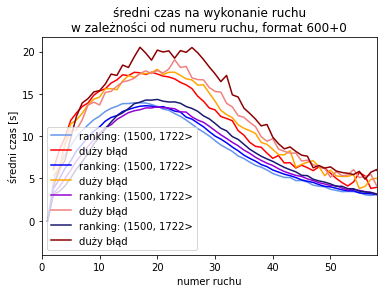

In [9]:
format = '600+0'
intervals = [
    db[(db['WhiteElo'] <= 1267)&(db['BlackElo'] <= 1267)],
    db[(db['WhiteElo'].between(1268,1500))&(db['BlackElo'].between(1268,1500))],
    db[(db['WhiteElo'].between(1501,1722))&(db['BlackElo'].between(1501,1722))],
    db[(db['WhiteElo'] > 1722)&(db['BlackElo'] > 1722)]
]

colors = ['cornflowerblue','red','blue','orange','darkviolet','lightcoral','midnightblue','darkred']
i=0
for interval in intervals:

    a = interval.groupby(['TimeControl','move']).agg({'delta_time': np.mean}).reset_index()

    p1 = a[a['TimeControl'] == format][['move','delta_time']]
    b = interval.groupby(['TimeControl','score','move']).agg({'delta_time': np.mean}).reset_index()
    p2 = b[(b['TimeControl'] == format) & (b['score'] == 'blunder')][['move','delta_time']]

    plt.figure(1)
    plt.plot(p1['move'],p1['delta_time'],label='ranking: (1500, 1722>',color=colors[i])

    plt.plot(p2['move'],p2['delta_time'],label='duży błąd',color=colors[i+1])
    i+=2
plt.legend()
plt.xlim(0,58)
plt.xlabel('numer ruchu')
plt.ylabel("średni czas [s]")
plt.title(f'średni czas na wykonanie ruchu\nw zależności od numeru ruchu, format {format}')
plt.savefig('graph.svg')
plt.show()

tyle ruchów na gre jest

In [ ]:
# ruchy kwantyl rzędu .95
db[['game_ID','move']].groupby('game_ID').max().quantile(.95)

In [ ]:
r2/r2.sum()
plt.figure()
plt.plot(np.arange(1,121),r2/r2.sum())

plt.plot([58,58],[0,0.01], color='red')

plt.text(52, 0.013,'kwantyl 0.95\nruch 58',color='red')



plt.xlabel('liczba zagranych ruchów w grze')
plt.ylabel('p')
plt.title('rozkład długości gry (liczba zagranych ruchów)')
plt.savefig('graph.svg')
plt.show()

In [ ]:
np.arange(1,120)